# Знакомство с данными

## MNIST Digits

Воспользуйтесь данными с https://www.kaggle.com/c/digit-recognizer/data 
Далее предполагается, что файлы test.csv и train.csv расположены в одной директории с notebook-ом.

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

In [2]:
# Загрузите обучающую выборку (признаки и метки классов)
train_data = pd.read_csv('train.csv')
images = train_data.iloc[:, 1:].as_matrix()
labels = train_data.iloc[:, :1].as_matrix()

In [3]:
def get_img(i):
    img = images[i].reshape((28,28))
    return img

sz = images.shape[0]
image_sz = images.shape[1]

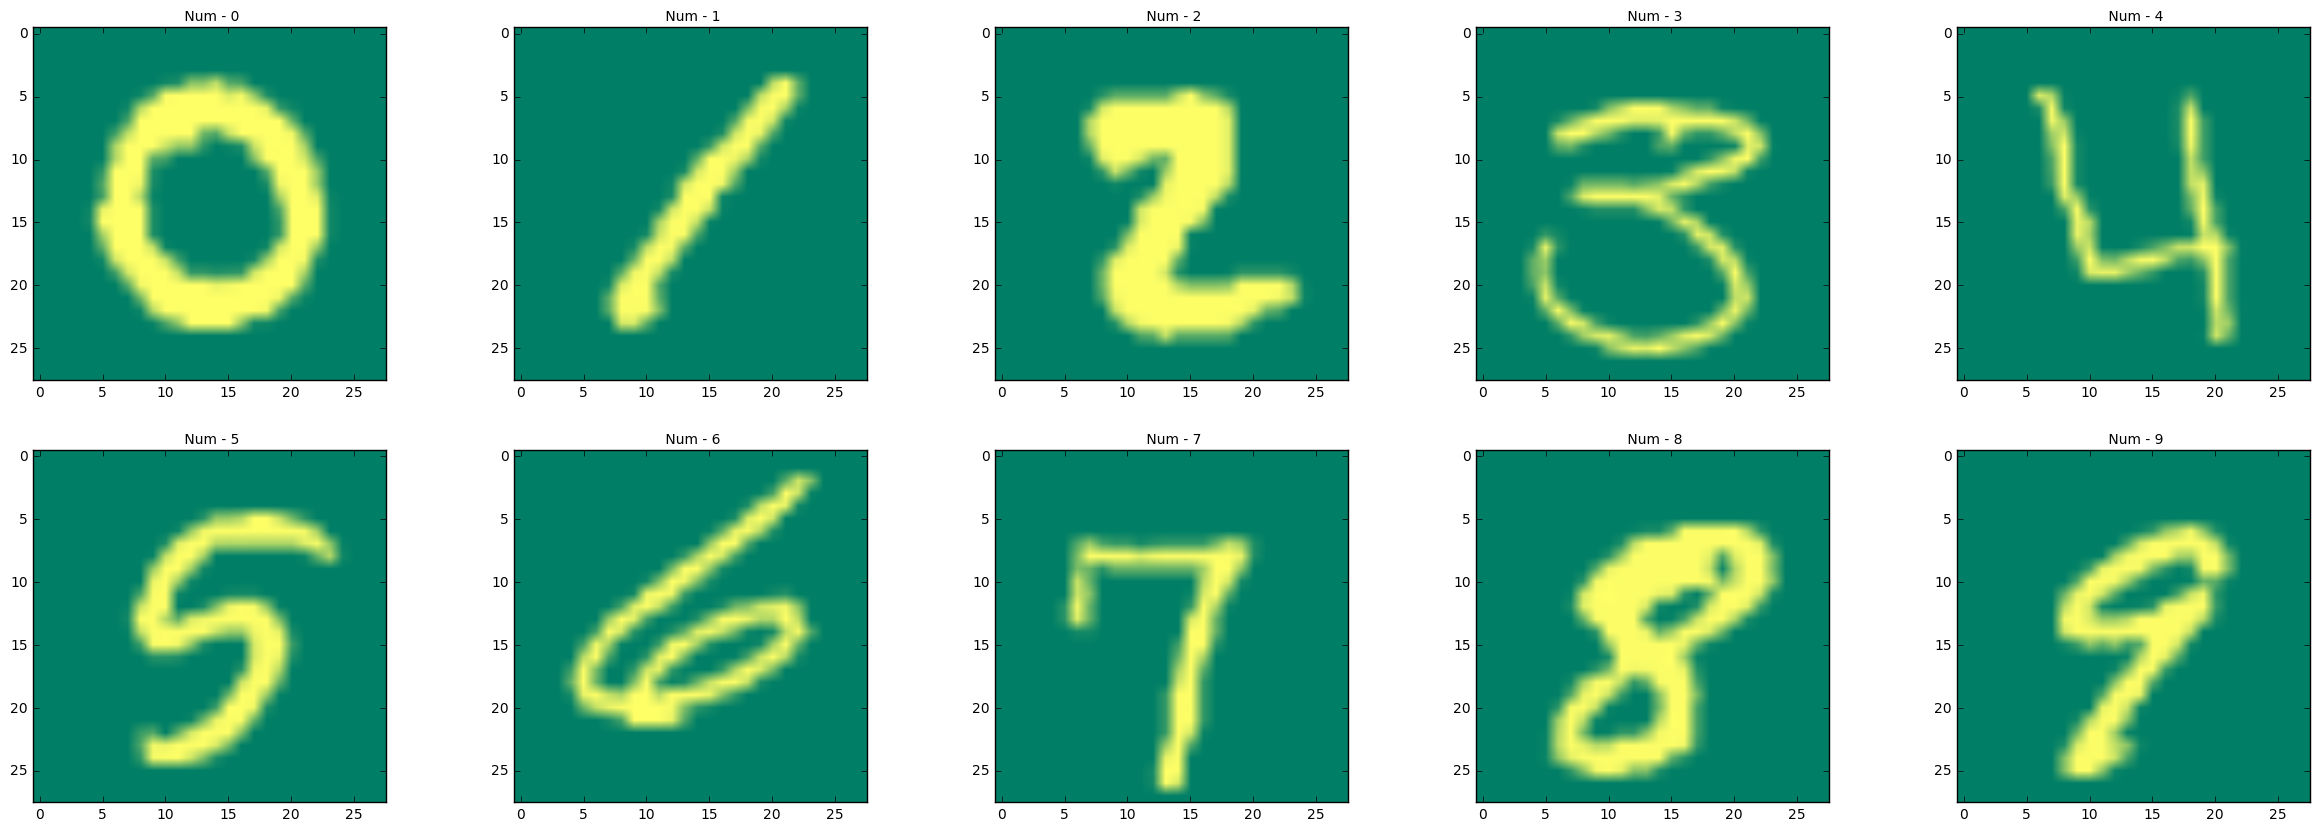

In [4]:
# нарисуйте по одной картинке каждой из 10 цифр (любые)
plt.figure(figsize=(30, 10))
for num in range(10):
    for i in range(sz):
        if labels[i] == num:
            plt.subplot(2, 5, num + 1)
            plt.imshow(get_img(i), cmap='summer')
            title_text = ' Num - ' + str(num)
            plt.title(title_text, size=10)
            break

In [5]:
# опишите, сколько признаков в выборке, сколько объектов. Каких типов признкаки и объекты?

Признаки в данном случае это пиксели в нашем изображение, так как каждый из них несет в себе какую-то информацию. Их количество, а так же размер выборки, можем узнать пременив метод shape(): 

In [6]:
print('Количество пикселей')
print('-------------------------------------------')
print('print(images.shape[1])')
print(images.shape[1])
print('\n\n')
print('Размер выборки')
print('-------------------------------------------')
print('print(images.shape[0])')
print(images.shape[0])

Количество пикселей
-------------------------------------------
print(images.shape[1])
784



Размер выборки
-------------------------------------------
print(images.shape[0])
42000


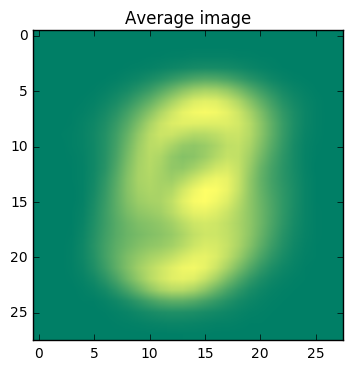

In [7]:
# нарисуйте среднее изображение, нарисуйте среднее изображение для каждой из цифр
# Прокомментируйте

avg_img = sum(images) / image_sz
avg_img = avg_img.reshape((28,28)) 
plt.imshow(avg_img, cmap='summer')
plt.title('Average image')

Так как признаки в нашем случае это пиксели, строим изображение, усредненное по всем признакам. Аналогично делаем с каждой из цифр.

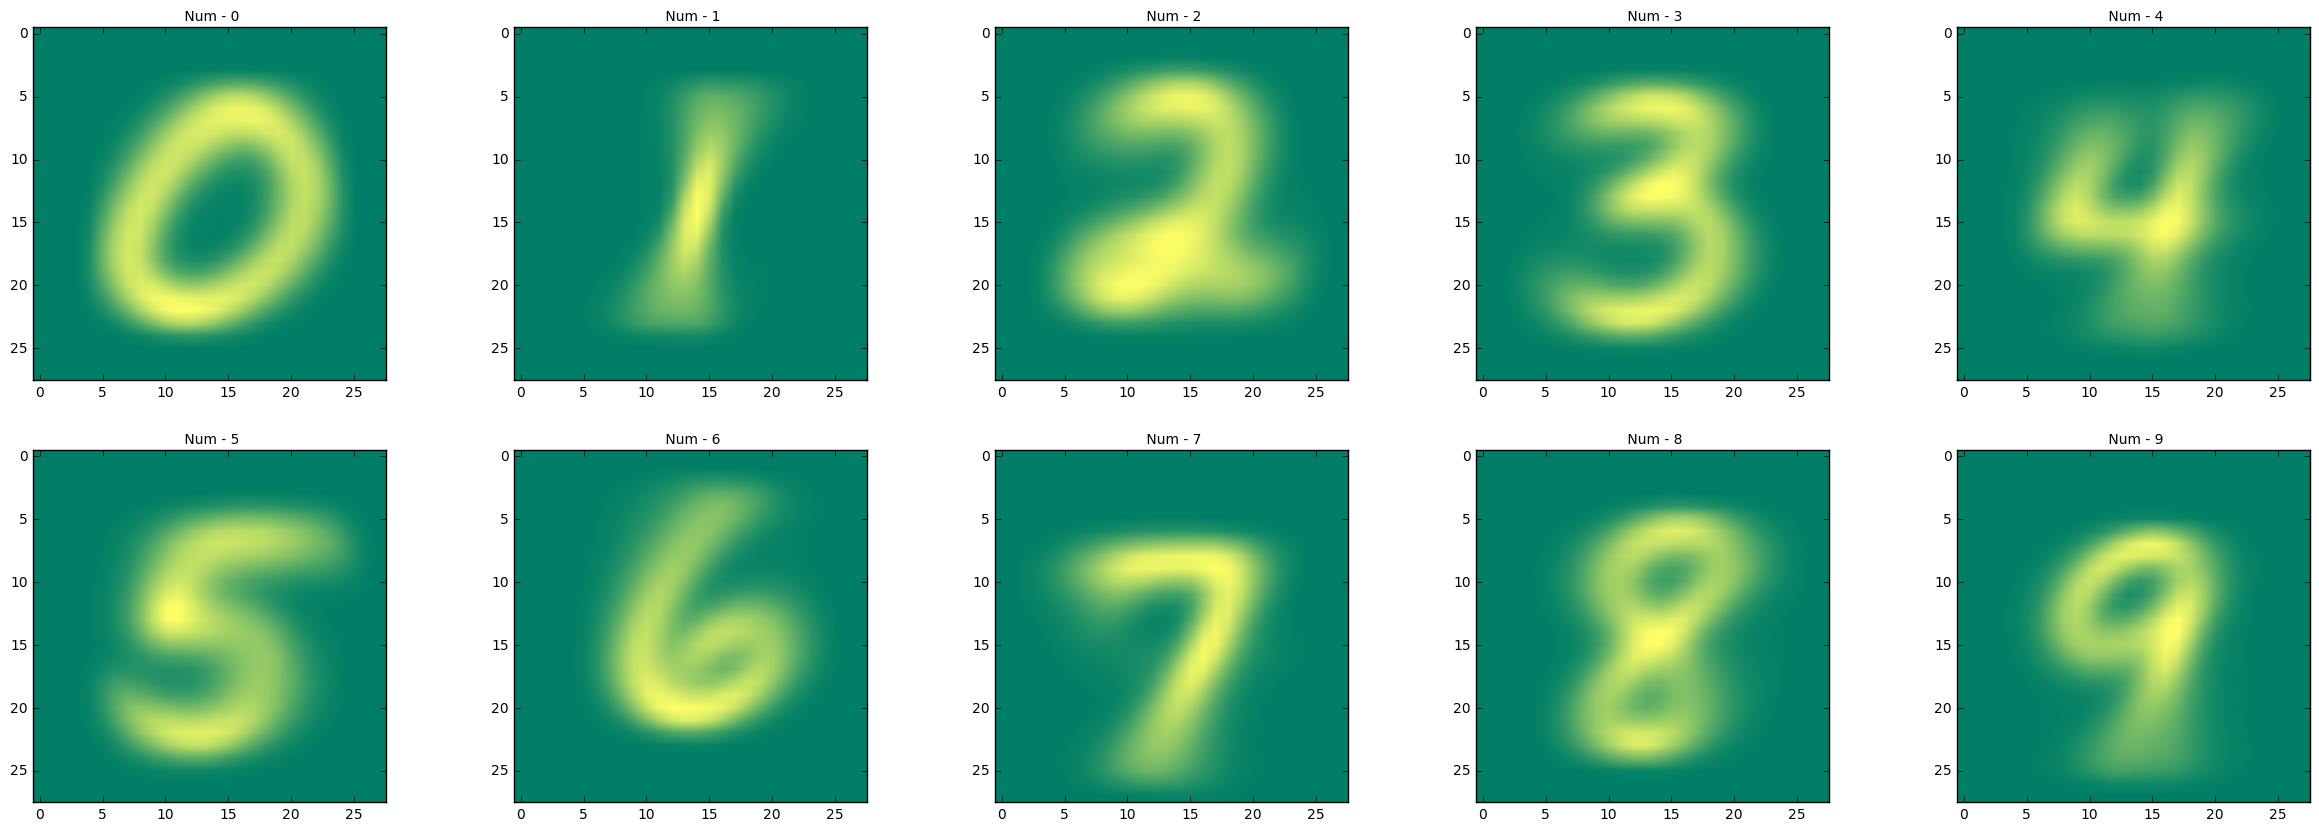

In [8]:
plt.figure(figsize=(30, 10))
for num in range(10):
        img = sum(images[i] for i in range(sz) if labels[i] == num)
        img = img.reshape((28,28))
        plt.subplot(2, 5, num + 1)
        plt.imshow(img, cmap='summer')
        title_text = ' Num - ' + str(num)
        plt.title(title_text, size=10)

In [9]:
# нарисуйте 3 самых близких с среднему изображинию и 3 самых далеких от среднего изображений

Определим расстояние в нашем пространстве как евкидову норму на векторах, содержащие данные о наших изображениях. Посчитаем расстояние каждого вектора от среднего.

In [10]:
distances = list()
vector_avg_img = sum(images) // sz
for i in range(sz):
    dist = sum((images[i] - vector_avg_img)**2)
    distances.append((dist, i))
distances.sort(key=lambda x: x[0])

Отсортировав массив из расстояний, мы можем пойти сначала чтобы посмотреть на самые далекие элементы, и наоборот с конца, чтобы посмотреть на самые близкие.

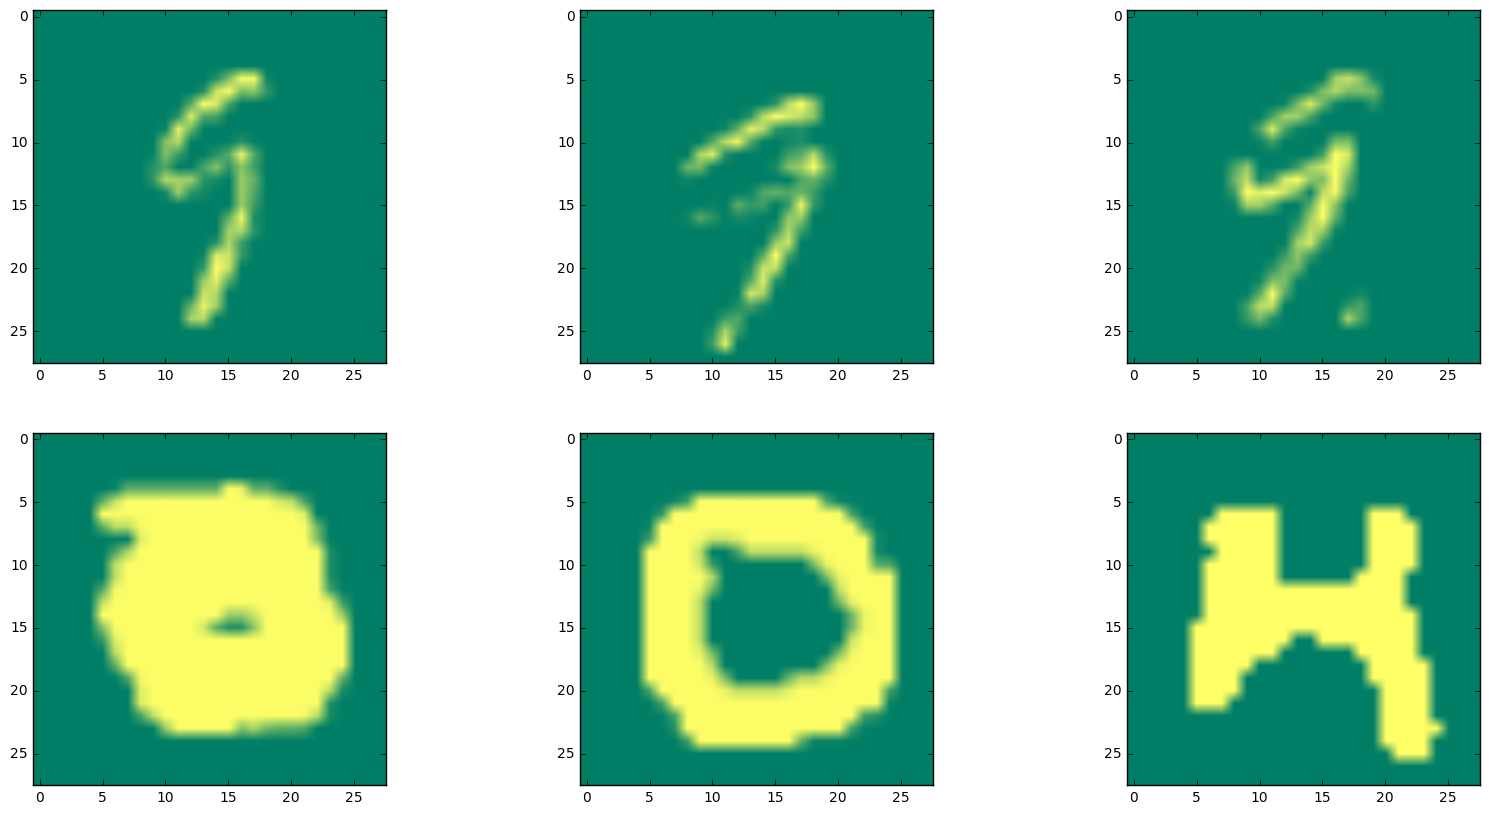

In [11]:
plt.figure(figsize=(20, 10))
for i in range(3):
    plt.subplot(2, 3, i + 1)
    plt.imshow(get_img(distances[i][1]), cmap='summer')
for i in range(3):
    plt.subplot(2, 3, i + 4)
    plt.imshow(get_img(distances[-i - 1][1]), cmap='summer')

Аналогично для каждой цифры.

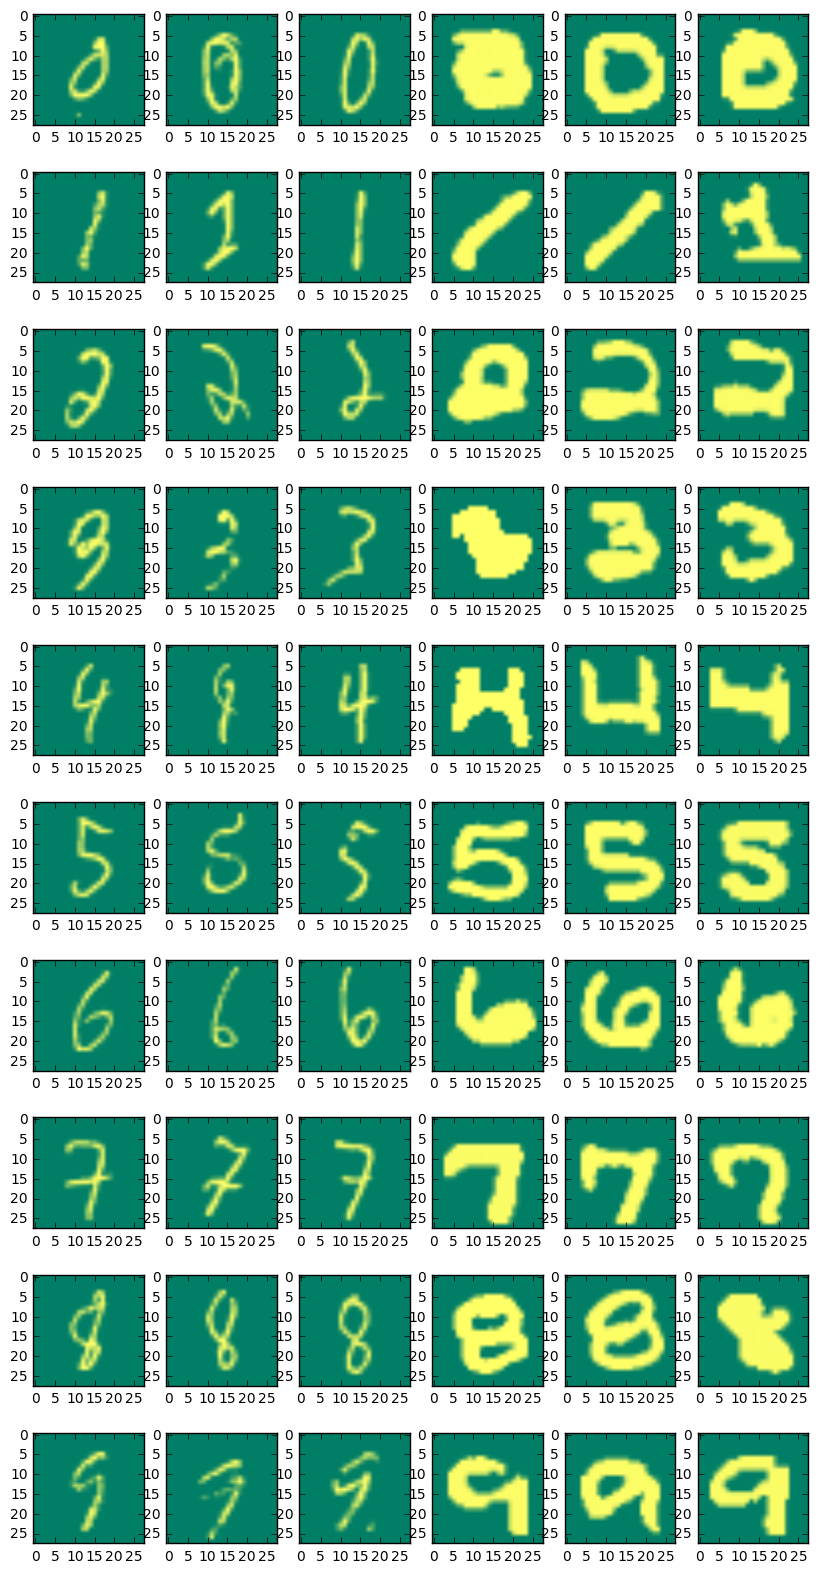

In [12]:
# повторите предыдущий пункт для каждой из цифр
plt.figure(figsize=(10, 20))
print_images = 1
for num in range(10):
    done = 0
    for obj in distances:
        if done < 3:
            if labels[obj[1]] == num:
                plt.subplot(10, 6, print_images)
                plt.imshow(get_img(obj[1]), cmap='summer')
                done += 1
                print_images += 1
        else:
            break
    
    done = 0
    for obj in reversed(distances):
        if done < 3:
            if labels[obj[1]] == num:
                plt.subplot(10, 6, print_images)
                plt.imshow(get_img(obj[1]), cmap='summer')
                done += 1
                print_images += 1
        else:
            break

In [ ]:
# разбейте выборку на две псевдослучайные подвыборки повторяемым образом (70:30)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math

## Bad usage
print("-"*80)
print("\nBad usage example\n")
for experiment_index in range(2):
    print("Experiment №", experiment_index)
    print("Our code")
    np.random.seed(0)
    print(np.random.normal())
    print(np.random.normal())
    print("Code after")
    print(np.random.normal())
    print(np.random.normal())

## Good usage
print("-"*80)
print("\nGood usage example\n")
for experiment_index in range(2):
    print("Experiment №", experiment_index)
    print("Our code")
    current_state = np.random.get_state()
    np.random.seed(0)
    print(np.random.normal(1))
    print(np.random.normal(1))
    np.random.set_state(current_state)
    print("Code after")
    print(np.random.normal())
    print(np.random.normal(1))

Воспользуемся встроенной функцией для решения таких задач.

In [13]:
images_train, images_test, labels_train, labels_test = train_test_split(images, labels, test_size=0.3, random_state=17)

In [ ]:
# Какая еще информация о данных кажется Вам важной?

Стоит отметить, что нам важно следить за количеством элементов, их типом, объемами памяти, и тд... 